In [ ]:
## OpenSoundscape RIBBIT tutorial
# http://opensoundscape.org/en/latest/tutorials/RIBBIT_pulse_rate_demo.html

## Setup 

In [6]:
# suppress warnings
import warnings
warnings.simplefilter('ignore')

#import packages
import numpy as np
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt
import subprocess
from datetime import datetime


#local imports from opensoundscape
from opensoundscape.audio import Audio
from opensoundscape.spectrogram import Spectrogram
from opensoundscape.ribbit import ribbit

# create big visuals
plt.rcParams['figure.figsize']=[15,8]
pd.set_option('display.precision', 2)

## Set parameters 

In [7]:
# minimum and maximum rate of pulsing (pulses per second) to search for
pulse_rate_range = [20,27]

# look for a vocalization in the range of 1000-2000 Hz
signal_band = [600,800]

# subtract the amplitude signal from these frequency ranges
#noise_bands = [ [0,200], [1500,2000]]
noise_bands = [[0,10]]

#divides the signal into segments this many seconds long, analyzes each independently
clip_duration = 0.5 #seconds
clip_overlap = 0 #seconds

#if True, it will show the power spectrum plot for each audio segment
show_plots = True

## Analyzing files from pond 400, 2020

In [12]:
#took about 35  min 

# set up a dataframe for storing files' scores and labels
df = pd.DataFrame(index = glob('/Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/*'),columns=['score','label'])

# label is 1 if the file contains a Great Plains Toad vocalization, and 0 if it does not
# df['label'] = [1 if 'Lcapito' in f else 0 for f in df.index]
#noise_bands = [[0,10]]

# calculate RIBBIT scores

start_time = datetime.now()
checkpoint = 0; 
for path in df.index:
    
    #make the spectrogram
    spec = Spectrogram.from_audio(Audio.from_file(path))

    #run RIBBIT
    score_df =  ribbit(
                        spec,
                        pulse_rate_range=pulse_rate_range,
                        signal_band=signal_band,
                        clip_duration=clip_duration,
                        #noise_bands=noise_bands,
                        plot=False)

    # use the maximum RIBBIT score from any window as the score for this file
    # multiply the score by 10,000 to make it easier to read
    maxIndex= score_df.score.idxmax()
    
    df.at[path,'score'] = score_df.at[maxIndex, 'score'] * 10000
    df.at[path,'time_stamp'] = score_df.at[maxIndex, 'start_time']
    checkpoint = checkpoint + 1
    
    if checkpoint % 100 == 0:
        print("Finished file number ", checkpoint, "/nFile name: ", path)
        df.sort_values(by='score',ascending=False).head(1)
        df.to_csv('flsh_401_2020_ribbit_scores.csv') 

        
df.to_csv('flsh_401_2020_ribbit_scores.csv') 
print('Time elapsed ',datetime.now() - start_time)

print("Files sorted by score, from highest to lowest:")
df.sort_values(by='score',ascending=False)


/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

Finished file number  100 /nFile name:  /Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200123_220100.wav


/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

Finished file number  200 /nFile name:  /Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200203_231100.wav


/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

Finished file number  300 /nFile name:  /Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200215_002100.wav


/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

Finished file number  400 /nFile name:  /Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200226_013100.wav


/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

Finished file number  500 /nFile name:  /Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200308_023900.wav


/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

Finished file number  600 /nFile name:  /Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200401_025700.wav


/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

Finished file number  700 /nFile name:  /Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200413_020500.wav


/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

Finished file number  800 /nFile name:  /Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200425_221400.wav


/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

Finished file number  900 /nFile name:  /Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200508_022300.wav


/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

Finished file number  1000 /nFile name:  /Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200520_223200.wav


/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

Finished file number  1100 /nFile name:  /Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200602_024000.wav


/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/s

Time elapsed  7:33:16.643132
Files sorted by score, from highest to lowest:


,score,label,time_stamp
/Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200331_185700.wav,375.66,NaN,19.5
/Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200331_215700.wav,346.13,NaN,54.0
/Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200226_183200.wav,277.55,NaN,176.5
/Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200506_192200.wav,204.3,NaN,227.0
/Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200506_202200.wav,191.9,NaN,223.5
...,...,...,...
/Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200120_235800.wav,7.98,NaN,28.0
/Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200130_200800.wav,7.97,NaN,7.0
/Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200503_232000.wav,7.89,NaN,195.5
/Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200416_010700.wav,7.77,NaN,246.5


In [461]:
flshe_399_2020_df = df

In [455]:
flshe_399_2020_df.to_csv('flsh_399_2020_ribbit_scores.csv') 

Text(0.5, 1.0, 'RIBBIT scores')

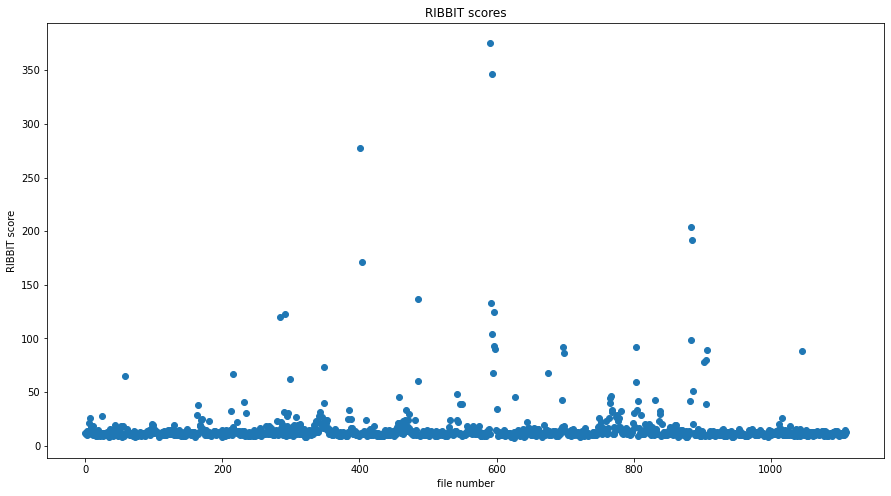

In [462]:
# plot the score vs time of each window
plt.scatter(range(0,len(flshe_399_2020_df)),flshe_399_2020_df['score'])
plt.xlabel('file number')
plt.ylabel('RIBBIT score')
plt.title('RIBBIT scores')


In [464]:
flshe_399_2020_df.sort_values(by='score',ascending=False).head(50)
#flshe_399_2020_df.filter(regex = '202003', axis = 0).sort_values(by='score',ascending=False).head(60)

,score,label,time_stamp
/Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200331_185700.wav,375.66,NaN,19.5
/Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200331_215700.wav,346.13,NaN,54.0
/Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200226_183200.wav,277.55,NaN,176.5
/Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200506_192200.wav,204.3,NaN,227.0
/Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200506_202200.wav,191.9,NaN,223.5
/Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200226_203200.wav,170.87,NaN,277.5
/Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200306_223900.wav,136.68,NaN,209.5
/Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200331_195700.wav,132.77,NaN,163.5
/Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200331_235700.wav,124.24,NaN,157.5
/Volumes/TOSHIBA EXT/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_401/TEST_0+1_20200214_012100.wav,123.04,NaN,231.0
